In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
data=pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# descriptive stats

In [3]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
data.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [6]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [7]:
data.shape

(1338, 7)

# perfroming EDA

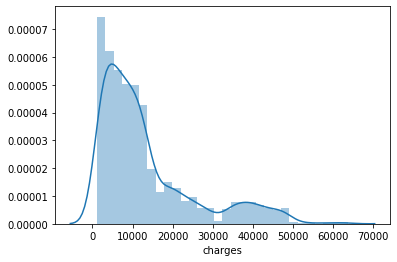

In [8]:
sns.distplot(data['charges'])
##it is right skewed
## lets check for the log of it

# preassumptions
# 1.normal dis of target
# 2.linear relationship
# 3.multicollinearity

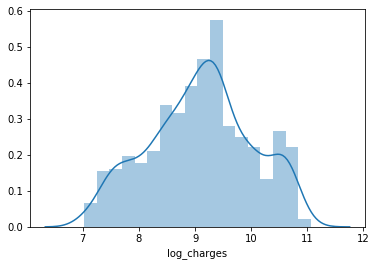

In [9]:
data['log_charges']=np.log(data['charges'])
sns.distplot(data['log_charges'])
## the normality of target is the must condition as we check every other variable with this, this could provide 
## us wrong results if not checked and done with normality

In [10]:
data1=data.drop(['charges'],axis=1)
## dropping the charges and creating a new df

In [11]:
data1.head()

,age,sex,bmi,children,smoker,region,log_charges
0,19,female,27.900,0,yes,southwest,9.734176
1,18,male,33.770,1,no,southeast,7.453302
2,28,male,33.000,3,no,southeast,8.400538
3,33,male,22.705,0,no,northwest,9.998092
4,32,male,28.880,0,no,northwest,8.260197


In [12]:
data1.isnull().sum()

age            0
sex            0
bmi            0
children       0
smoker         0
region         0
log_charges    0
dtype: int64

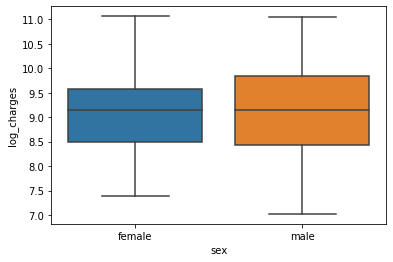

In [13]:
sns.boxplot(x='sex',y='log_charges',data=data1)
## shows a low impact on our target

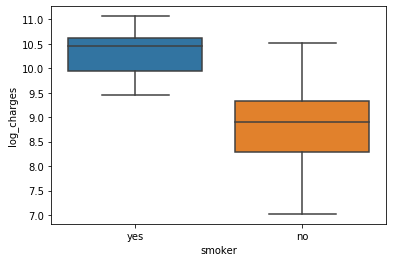

In [14]:
sns.boxplot(x='smoker',y='log_charges',data=data1)
## has a greater impact on target

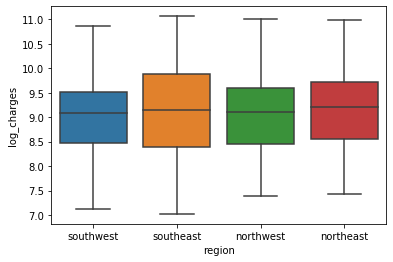

In [15]:
sns.boxplot(x='region',y='log_charges',data=data1)
## region has lesser impact on target

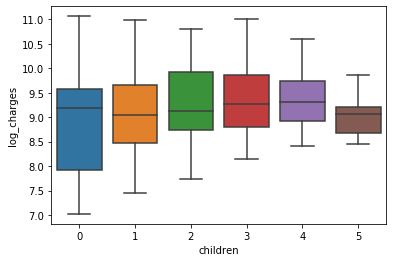

In [16]:
sns.boxplot(x='children',y='log_charges',data=data1)
## shows children has great impact on our target

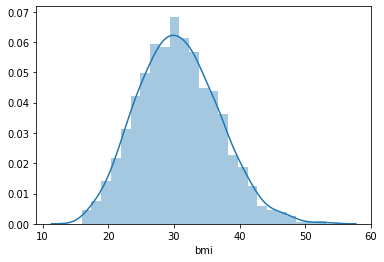

In [17]:
sns.distplot(data1['bmi'])

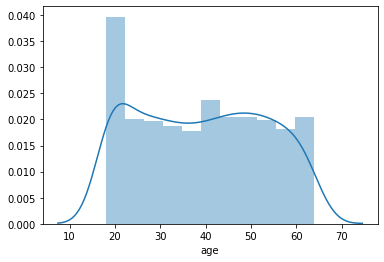

In [18]:
sns.distplot(data1['age'])

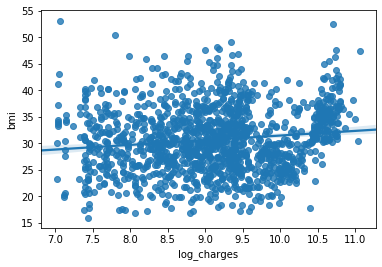

In [19]:
sns.regplot(x='log_charges',y='bmi',data=data1)
## not that great linearity but can be considered

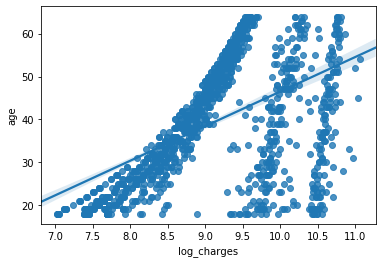

In [20]:
sns.regplot(x='log_charges',y='age',data=data1)
## has a linear relationship between age and our target
## so we must consider this in our reg.

# checking for multicollinearity

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data1[['age','bmi']]
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['Features']=variables.columns
vif

,VIF,Features
0,7.457006,age
1,7.457006,bmi


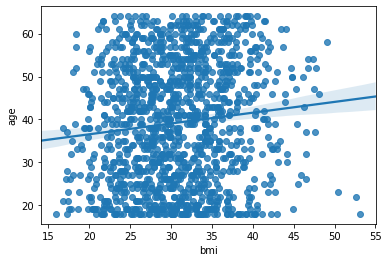

In [22]:
sns.regplot(x='bmi',y='age',data=data1)

In [23]:
data1.corr()

,age,bmi,children,log_charges
age,1.000000,0.109272,0.042469,0.527834
bmi,0.109272,1.000000,0.012759,0.132669
children,0.042469,0.012759,1.000000,0.161336
log_charges,0.527834,0.132669,0.161336,1.000000


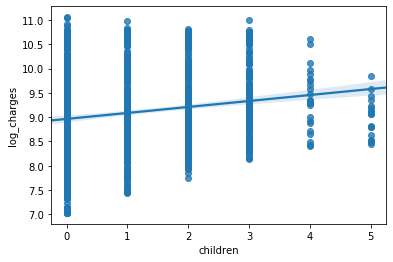

In [24]:
sns.regplot(x='children',y='log_charges',data=data1)

In [25]:
data_cleaned=data1.reset_index(drop=True)

In [26]:
data_cleaned.head()

,age,sex,bmi,children,smoker,region,log_charges
0,19,female,27.900,0,yes,southwest,9.734176
1,18,male,33.770,1,no,southeast,7.453302
2,28,male,33.000,3,no,southeast,8.400538
3,33,male,22.705,0,no,northwest,9.998092
4,32,male,28.880,0,no,northwest,8.260197


In [27]:
data_cleaned.columns.values

array(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'log_charges'],
      dtype=object)

In [28]:
data_cleaned.describe()

,age,bmi,children,log_charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,9.098659
std,14.049960,6.098187,1.205493,0.919527
min,18.000000,15.960000,0.000000,7.022756
25%,27.000000,26.296250,0.000000,8.463853
50%,39.000000,30.400000,1.000000,9.146552
75%,51.000000,34.693750,2.000000,9.719558
max,64.000000,53.130000,5.000000,11.063045


# dUMMY CREATION

In [29]:
data_with_dummies=pd.get_dummies(data_cleaned,drop_first=True)
data_with_dummies

,age,bmi,children,log_charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,9.734176,0,1,0,0,1
1,18,33.770,1,7.453302,1,0,0,1,0
2,28,33.000,3,8.400538,1,0,0,1,0
3,33,22.705,0,9.998092,1,0,1,0,0
4,32,28.880,0,8.260197,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,9.268661,1,0,1,0,0
1334,18,31.920,0,7.698927,0,0,0,0,0
1335,18,36.850,0,7.396233,0,0,0,1,0
1336,21,25.800,0,7.604867,0,0,0,0,1


In [30]:
data_with_dummies.columns

Index(['age', 'bmi', 'children', 'log_charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables1=data_with_dummies[['age','bmi', 'children', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest']]
vif1=pd.DataFrame()
vif1['VIF']=[variance_inflation_factor(variables1.values,i) for i in range(variables1.shape[1])]
vif1['Features']=variables1.columns
vif1

,VIF,Features
0,7.686965,age
1,11.358443,bmi
2,1.809930,children
3,2.003185,sex_male
4,1.261233,smoker_yes
5,1.890281,region_northwest
6,2.265564,region_southeast
7,1.960745,region_southwest


In [32]:
data_with_dummies1=pd.get_dummies(data_cleaned,drop_first=False)
data_with_dummies1

,age,bmi,children,log_charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,9.734176,1,0,0,1,0,0,0,1
1,18,33.770,1,7.453302,0,1,1,0,0,0,1,0
2,28,33.000,3,8.400538,0,1,1,0,0,0,1,0
3,33,22.705,0,9.998092,0,1,1,0,0,1,0,0
4,32,28.880,0,8.260197,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,9.268661,0,1,1,0,0,1,0,0
1334,18,31.920,0,7.698927,1,0,1,0,1,0,0,0
1335,18,36.850,0,7.396233,1,0,1,0,0,0,1,0
1336,21,25.800,0,7.604867,1,0,1,0,0,0,0,1


In [33]:
data_with_dummies1.columns

Index(['age', 'bmi', 'children', 'log_charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables2=data_with_dummies1[['age', 'bmi', 'children', 'log_charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest']]
vif2=pd.DataFrame()
vif2['VIF']=[variance_inflation_factor(variables2.values,i) for i in range(variables2.shape[1])]
vif2['Features']=variables2.columns
vif2

C:\Users\Madhan Dasari\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,Features
0,2.219991,age
1,1.140535,bmi
2,1.080852,children
3,4.309374,log_charges
4,inf,sex_female
5,inf,sex_male
6,inf,smoker_no
7,inf,smoker_yes
8,inf,region_northeast
9,inf,region_northwest


# Rearrange the columns

In [35]:
data_with_dummies.columns

Index(['age', 'bmi', 'children', 'log_charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [36]:
cols=['log_charges', 'bmi','age','children', 'sex_male', 'smoker_yes',
        'region_southeast', 'region_southwest']

In [37]:
data_preprocessed=data_with_dummies[cols]
data_preprocessed.head()

,log_charges,bmi,age,children,sex_male,smoker_yes,region_southeast,region_southwest
0,9.734176,27.900,19,0,0,1,0,1
1,7.453302,33.770,18,1,1,0,1,0
2,8.400538,33.000,28,3,1,0,1,0
3,9.998092,22.705,33,0,1,0,0,0
4,8.260197,28.880,32,0,1,0,0,0


# Linear Regression Model

In [45]:
target=data_preprocessed['log_charges']
inputs=data_preprocessed.drop(['log_charges'],axis=1)

# Scaling

In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [47]:
inputs_scaled=scaler.transform(inputs)

# TRain Test Split

In [41]:
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test=train_test_split(inputs_scaled,target,test_size=0.2,random_state=365)

# create regression 

In [48]:
x=sm.add_constant(inputs_scaled)

In [49]:
result=sm.OLS(target,inputs_scaled).fit()
result.summary()
## observed that the region_northwest has p(t)>0.05 so removed then
# the f-stat has also changed from 549.8 to 626.7 so this is the better model

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            log_charges   R-squared (uncentered):                   0.008
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              1.486
Date:                Fri, 10 Apr 2020   Prob (F-statistic):                       0.168
Time:                        11:36:29   Log-Likelihood:                         -4854.6
No. Observations:                1338   AIC:                                      9723.
Df Residuals:                    1331   BIC:                                      9760.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0815      0.263      0.310      0.756      -0.434       0.597
x2             0.4858      0.252      1.929      0.054      -0.008       0.980
x3             0.1221      0.250      0.488      0.626      -0.369       0.613
x4            -0.0376      0.251     -0.150      0.881      -0.530       0.454
x5             0.6278      0.251      2.500      0.013       0.135       1.120
x6            -0.0558      0.279     -0.200      0.841      -0.602       0.491
x7            -0.0416      0.267     -0.155      0.876      -0.566       0.483
==============================================================================
Omnibus:                      461.488   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1651.543
Skew:                           1.673   Prob(JB):                         0.00
Kurtosis:                       7.294   Cond. No.                         1.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""